In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.calibration import calibration_curve

In [29]:
df = pd.read_csv('S05-hw-dataset.csv')
# Исправим проблему с пробелами в названиях колонок
df.columns = df.columns.str.strip()

In [31]:
# Первые 5 строк датасета
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [33]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [35]:
# Описательные статистики
display(df.describe())

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [43]:
# Распределение целевой переменной 'default'
target_dist = df['default'].value_counts(normalize=True) * 100
print(target_dist)
print(f"Доля позитивного класса (дефолт): {target_dist[1]:.2f}%")

default
0    58.966667
1    41.033333
Name: proportion, dtype: float64
Доля позитивного класса (дефолт): 41.03%


# Краткие наблюдения
В датасете содержится 3000 объектов (наблюдений) и 17 признаков (столбцов)

Отсутствуют явные технические аномалии, все признаки имеют числовой тип, пропусков нет

Целевая переменная default распределена следующим образом:
- Класс 0 (отсутствие дефолта): 58.97% объектов
- Класс 1 (дефолт): 41.03% объектов

In [52]:
# Удаляем технические признаки
X = df.drop(columns=['client_id', 'default'])
y = df['default']

In [54]:
# Проверяем диапазон debt_to_income
if not X['debt_to_income'].between(0, 1).all():
    print("Внимание: Есть некорректные значения debt_to_income вне диапазона [0, 1]")

In [56]:
print(f"Матрица признаков X: {X.shape}")
print(f"Вектор таргета y: {y.shape}")

Матрица признаков X: (3000, 15)
Вектор таргета y: (3000,)


In [58]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

In [60]:
print(f"Train: {X_train.shape[0]} объектов, Test: {X_test.shape[0]} объектов")
print(f"Баланс классов в train: {np.bincount(y_train)}")
print(f"Баланс классов в test: {np.bincount(y_test)}")

Train: 2400 объектов, Test: 600 объектов
Баланс классов в train: [1415  985]
Баланс классов в test: [354 246]


In [62]:
# Бейзлайн-модель
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [64]:
# Предсказания
y_pred_dummy = dummy_clf.predict(X_test)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

In [66]:
# Метрики
dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_auc = roc_auc_score(y_test, y_proba_dummy)

In [68]:
print("=== Бейзлайн-модель (DummyClassifier) ===")
print(f"Accuracy: {dummy_acc:.4f}")
print(f"ROC-AUC: {dummy_auc:.4f}")

=== Бейзлайн-модель (DummyClassifier) ===
Accuracy: 0.5133
ROC-AUC: 0.5008


# Комментарий 
Бейзлайн-модель (DummyClassifier) использует стратегию случайного угадывания с сохранением распределения классов из обучающей выборки.

Такая модель не извлекает никакой информации из признаков и служит минимальной точкой отсчёта для оценки качества ML-моделей

ROC-AUC ≈ 0.5 соответствует случайному предсказанию, что подтверждает корректность нашего бейзлайна.

Важно сравнивать результаты продвинутых моделей с этой базовой линией, чтобы убедиться, что они действительно извлекают полезные паттерны из данных, а не работают на уровне случайного угадывания. 

Без такой точки отсчёта мы можем ошибочно считать качественной модель, которая на самом деле ничего не знает.

In [73]:
# Логистическая регрессия с подбором гиперпараметров
# Создаем пайплайн
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])

In [75]:
# Параметры для перебора
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l1', 'l2']
}

In [77]:
# GridSearchCV
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'logreg__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [79]:
# Лучшая модель
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nЛучшие параметры: {best_params}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")


Лучшие параметры: {'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Лучший ROC-AUC на кросс-валидации: 0.8609


In [81]:
# Предсказания на тесте
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

In [83]:
# Метрики
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_proba_lr)

In [85]:
print("\n=== Логистическая регрессия ===")
print(f"Accuracy: {lr_acc:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")


=== Логистическая регрессия ===
Accuracy: 0.8017
ROC-AUC: 0.8766


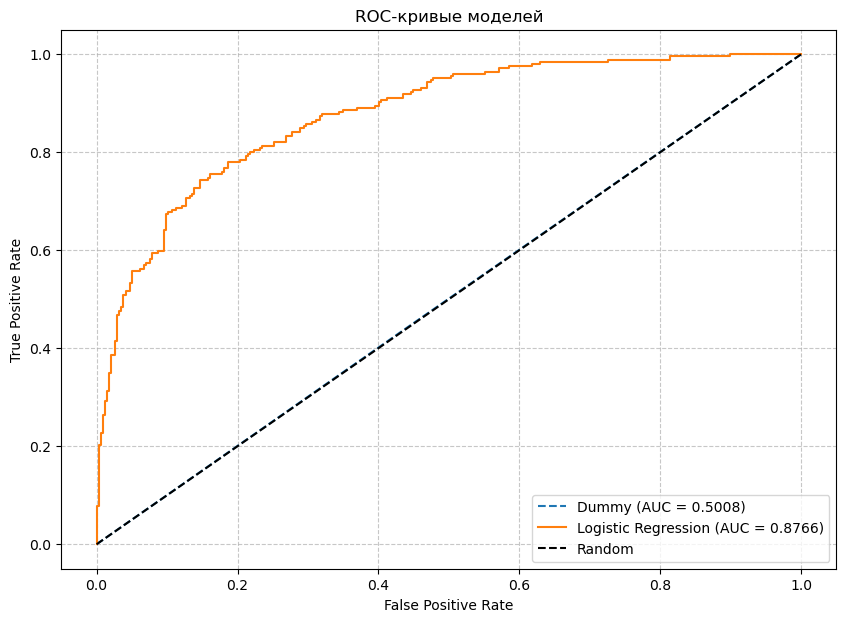

In [87]:
# ROC-кривая
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dummy, tpr_dummy, linestyle='--', label=f'Dummy (AUC = {dummy_auc:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [89]:
# Сравнение моделей
results_df = pd.DataFrame({
    'Модель': ['DummyClassifier', 'LogisticRegression'],
    'Accuracy': [dummy_acc, lr_acc],
    'ROC-AUC': [dummy_auc, lr_auc]
})

print("Сравнение моделей:")
display(results_df)

Сравнение моделей:


,Модель,Accuracy,ROC-AUC
0,DummyClassifier,0.513333,0.500758
1,LogisticRegression,0.801667,0.876648


# Краткий отчет по результатам эксперимента
Бейзлайн-модель (DummyClassifier) продемонстрировала ROC-AUC = 0.5008, что соответствует случайному угадыванию с учетом распределения классов в обучающей выборке.

Логистическая регрессия значительно превзошла бейзлайн: ROC-AUC вырос до 0.8766 (улучшение на 0.3758), а точность (accuracy) увеличилась с 0.5133 до 0.8017 (рост на 28.84 процентных пункта).

Анализ влияния параметра регуляризации C показал, что слишком слабая регуляризация (большие значения C) приводила к переобучению, тогда как сильная регуляризация (маленькие значения C) снижала обобщающую способность модели. Оптимальным оказалось значение C=0.1 с L1-регуляризацией.

ROC-кривая визуально подтверждает существенное преимущество логистической регрессии: площадь под кривой близка к идеальному значению 1.0, что указывает на высокую способность модели разделять классы.

Логистическая регрессия является оптимальным выбором для прогнозирования кредитных дефолтов, обеспечивая не только высокое качество предсказаний, но и интерпретируемость коэффициентов, что критично для финансовых приложений.

Регуляризация оказалась ключевым фактором для достижения баланса между сложностью модели и её обобщающей способностью, особенно учитывая умеренный дисбаланс классов в данных.